# Generating N normal distributions with a given correlation
##### Author: Guillaume Guy
##### Date: 2020/10/25

###### Implementation of Joseph K's answer: https://math.stackexchange.com/questions/446093/generate-correlated-normal-random-variables

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def print_charact(x):
    print("mean",np.mean(x))
    print("std",np.std(x))
    return

In [4]:
_N = 1000 # the desired sample size
_corr = 0.5 # the desired correlation
_N_DIST = 10

# generate random normal distribution
acc = []
for i in range(_N_DIST):
    acc.append(np.reshape(np.random.normal(0,1,_N),(_N,-1)))
    
# Compute 
all_norm = np.concatenate(acc,axis=1)

print(all_norm.shape)

(1000, 10)


In [5]:
def generate_cov(dim):
    acc  = []
    for i in range(dim):
        row = np.ones((1,dim)) * _corr
        row[0][i] = 1
        acc.append(row)
    return np.concatenate(acc,axis=0)

In [6]:
cov = generate_cov(_N_DIST)
C = np.linalg.cholesky(cov)

Y = np.transpose(0 + np.dot(C,np.transpose(all_norm) ))

print("correlation:\n")

np.round(np.corrcoef(Y,rowvar=False),2)

correlation:



array([[1.  , 0.45, 0.46, 0.48, 0.5 , 0.49, 0.49, 0.52, 0.49, 0.48],
       [0.45, 1.  , 0.49, 0.52, 0.5 , 0.47, 0.5 , 0.53, 0.51, 0.47],
       [0.46, 0.49, 1.  , 0.5 , 0.49, 0.49, 0.51, 0.52, 0.49, 0.51],
       [0.48, 0.52, 0.5 , 1.  , 0.52, 0.47, 0.49, 0.54, 0.54, 0.5 ],
       [0.5 , 0.5 , 0.49, 0.52, 1.  , 0.5 , 0.52, 0.57, 0.51, 0.52],
       [0.49, 0.47, 0.49, 0.47, 0.5 , 1.  , 0.5 , 0.51, 0.52, 0.51],
       [0.49, 0.5 , 0.51, 0.49, 0.52, 0.5 , 1.  , 0.54, 0.52, 0.5 ],
       [0.52, 0.53, 0.52, 0.54, 0.57, 0.51, 0.54, 1.  , 0.55, 0.52],
       [0.49, 0.51, 0.49, 0.54, 0.51, 0.52, 0.52, 0.55, 1.  , 0.53],
       [0.48, 0.47, 0.51, 0.5 , 0.52, 0.51, 0.5 , 0.52, 0.53, 1.  ]])

In [7]:
cov

array([[1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. ]])

In [38]:
for i in range(_N_DIST):
    print(i)
    print_charact(Y[:,i])

0
mean 1.7904622168174454e-06
std 0.9821817946373764
1
mean -0.02090088636249413
std 0.9842734148976069
2
mean -0.0016655268110751748
std 0.981079983866336
3
mean 0.010311391507831912
std 0.9663983307800322
4
mean -0.009703661954811892
std 1.0136848058299461
5
mean 0.0146886861753113
std 0.9919174143858184
6
mean -0.016533876179727198
std 0.9970154508617741
7
mean -0.03270812898712095
std 1.0172743967467262
8
mean -0.000916190529393333
std 0.9808169489640567
9
mean 0.040731644788056194
std 0.9872486634445825


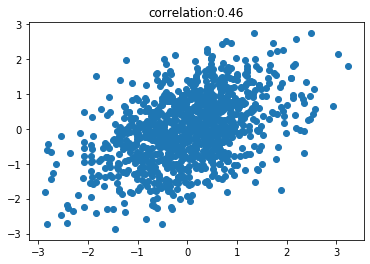

In [42]:
plt.scatter(x=Y[:,0],y=Y[:,1])
plt.title("correlation:" + str(np.round(np.corrcoef(Y[:,0],Y[:,1])[1,0],2)))
plt.show()